# Training models on the first company's dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
df = pd.read_csv('/content/EGX_DLY_COMI, 1D.csv')

In [ ]:
# seeing the data
print(df.head())   # the time is represented as timestamp

        time      open      high       low     close
0  989910000  0.839019  0.839019  0.827202  0.831220
1  989996400  0.827202  0.836419  0.823184  0.826020
2  990082800  0.827202  0.827202  0.820111  0.824366
3  990342000  0.815621  0.821293  0.815385  0.816566
4  990428400  0.813257  0.850836  0.809476  0.831456


In [ ]:
# data info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5529 entries, 0 to 5528
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    5529 non-null   int64  
 1   open    5529 non-null   float64
 2   high    5529 non-null   float64
 3   low     5529 non-null   float64
 4   close   5529 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 216.1 KB
None


In [ ]:
# statistics of the data
print(df.describe())

               time         open         high          low        close
count  5.529000e+03  5529.000000  5529.000000  5529.000000  5529.000000
mean   1.347961e+09    15.899816    16.113148    15.704246    15.912883
std    2.083471e+08    16.095197    16.328115    15.898890    16.119097
min    9.899100e+08     0.602676     0.602676     0.600312     0.602203
25%    1.165997e+09     3.450615     3.545152     3.357595     3.469266
50%    1.349338e+09     7.604309     7.734061     7.476685     7.619199
75%    1.528272e+09    29.916029    30.390631    29.518197    29.916029
max    1.707984e+09    89.000000    95.480003    86.000000    89.000000


In [ ]:
# we don't need to handle missing values or scaling here, since info() showed there are no Null values here, and
# descibe() showed that the scales of the 'open', 'high', and 'low' are similar
# however, we can check for outliers

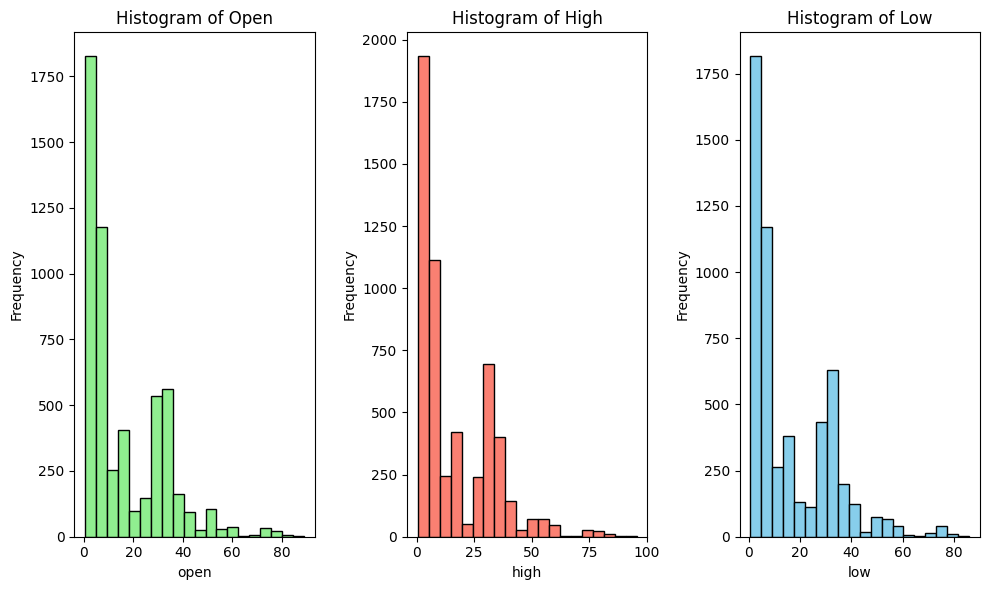

In [ ]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
plt.hist(df['open'], bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('open')
plt.ylabel('Frequency')
plt.title('Histogram of Open')

plt.subplot(1, 3, 2)
plt.hist(df['high'], bins=20, color='salmon', edgecolor='black')
plt.xlabel('high')
plt.ylabel('Frequency')
plt.title('Histogram of High')

plt.subplot(1, 3, 3)
plt.hist(df['low'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('low')
plt.ylabel('Frequency')
plt.title('Histogram of Low')

plt.tight_layout()
plt.show()

In [ ]:
# the histograms along with the output of describe() show that
# most of the prices are below 35

mean_open = df['open'].mean()
std_open = df['open'].std()

mean_high = df['high'].mean()
std_high = df['high'].std()

mean_low = df['low'].mean()
std_low = df['low'].std()

# getting outliers for the open, high, and low columns
outliers_open = df[(df['open'] < mean_open - 2 * std_open) | (df['open'] > mean_open + 2 * std_open)]
outliers_high = df[(df['high'] < mean_high - 2 * std_high) | (df['high'] > mean_high + 2 * std_high)]
outliers_low = df[(df['low'] < mean_low - 2 * std_low) | (df['low'] > mean_low + 2 * std_low)]

print("Outliers in 'open' column:", len(outliers_open))
print("Outliers in 'high' column:", len(outliers_high))
print("Outliers in 'low' column:", len(outliers_low))

Outliers in 'open' column: 254
Outliers in 'high' column: 255
Outliers in 'low' column: 255


In [ ]:
# I decided not to handle the outliers because they are low in quantity and in gravity
# They also haven't decreased the error values significantly after removing them

#outliers = pd.concat([outliers_open, outliers_high, outliers_low])

In [ ]:
#df = df.drop(outliers.index)
#print(df.describe())

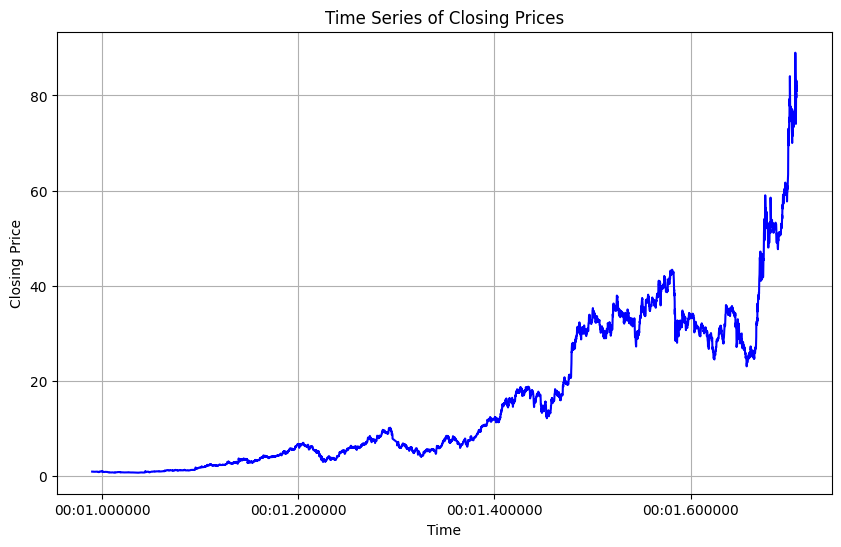

In [ ]:
df['time'] = pd.to_datetime(df['time'])

# Plot the time series of closing prices
plt.figure(figsize=(10, 6))
plt.plot(df['time'], df['close'], color='blue')
plt.title('Time Series of Closing Prices')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

# the time series graph shows that the closing price increases with the time that
# the stock is available which could mean that these are winning stocks

In [ ]:
correlation_matrix = df[['open', 'high', 'low', 'close']].corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Extract the correlation coefficients between 'Open', 'High', and 'Low' columns with 'Close' column
open_close_corr = correlation_matrix.loc['open', 'close']
high_close_corr = correlation_matrix.loc['high', 'close']
low_close_corr = correlation_matrix.loc['low', 'close']

# Print the correlation coefficients
print("\nCorrelation between Open and Close:", open_close_corr)
print("Correlation between High and Close:", high_close_corr)
print("Correlation between Low and Close:", low_close_corr)

Correlation Matrix:
           open      high       low     close
open   1.000000  0.999756  0.999798  0.999627
high   0.999756  1.000000  0.999692  0.999848
low    0.999798  0.999692  1.000000  0.999813
close  0.999627  0.999848  0.999813  1.000000

Correlation between Open and Close: 0.9996271736193851
Correlation between High and Close: 0.9998479213741992
Correlation between Low and Close: 0.9998129664422851


In [ ]:
# Handling the 'time' column
print('Years:', pd.to_datetime(df['time']).dt.year.unique())
print('Months:', pd.to_datetime(df['time']).dt.month.unique())
print('Days:', pd.to_datetime(df['time']).dt.day.unique())
print('Hours:', pd.to_datetime(df['time']).dt.hour.unique())
print('Minutes:', pd.to_datetime(df['time']).dt.minute.unique())
print('Seconds:', pd.to_datetime(df['time']).dt.second.unique())

Years: [1970]
Months: [1]
Days: [1]
Hours: [0]
Minutes: [0]
Seconds: [0 1]


In [ ]:
# it seems the dataset entries was all in the same hour and minute
# so we need to include only the second and part of the second of the opening time of the stock price
print('Microseconds:', pd.to_datetime(df['time']).dt.microsecond.unique())
print('Numbe of unique microseconds:', pd.to_datetime(df['time']).dt.microsecond.nunique())

Microseconds: [989910 989996 990082 ... 674460 674547 688972]
Numbe of unique microseconds: 5273


In [ ]:
df['second'] = pd.to_datetime(df['time']).dt.second
df['microsecond'] = pd.to_datetime(df['time']).dt.microsecond
print(df.head())

        time      open      high       low     close  second  microsecond
0  989910000  0.839019  0.839019  0.827202  0.831220       0       989910
1  989996400  0.827202  0.836419  0.823184  0.826020       0       989996
2  990082800  0.827202  0.827202  0.820111  0.824366       0       990082
3  990342000  0.815621  0.821293  0.815385  0.816566       0       990342
4  990428400  0.813257  0.850836  0.809476  0.831456       0       990428


In [ ]:
# Now to split the data to training and testing, and input an output
X = df[['second', 'microsecond', 'open', 'high', 'low']]
Y = df['close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, train_size=0.8, random_state=42)

In [ ]:
# choosing the models
model_1 = LinearRegression()
model_2 = GradientBoostingRegressor()
model_3 = MLPRegressor()

In [ ]:
model_1.fit(X_train, Y_train)
Y_pred = model_1.predict(X_test)
print("Linear Regressor mae:", mean_absolute_error(Y_test, Y_pred))
print("Linear Regressor mad:", np.mean(np.abs(Y_test - Y_pred)))
print("Linear Regressor mse:", mean_squared_error(Y_test, Y_pred))

Linear Regressor mae: 0.05501935812933258
Linear Regressor mad: 0.05501935812933258
Linear Regressor mse: 0.016123449023481277


In [ ]:
model_2.fit(X_train, Y_train)
Y_pred = model_2.predict(X_test)
print("Gradient Boosting Regressor mae:", mean_absolute_error(Y_test, Y_pred))
print("Gradient Boosting Regressor mad:", np.mean(np.abs(Y_test - Y_pred)))
print("Gradient Boosting Regressor mse:", mean_squared_error(Y_test, Y_pred))

Gradient Boosting Regressor mae: 0.10499947823920137
Gradient Boosting Regressor mad: 0.10499947823920137
Gradient Boosting Regressor mse: 0.042393890923274724


In [ ]:
model_3.fit(X_train, Y_train)
Y_pred = model_3.predict(X_test)
print("Multi-layer Perceptron Regressor mae:", mean_absolute_error(Y_test, Y_pred))
print("Multi-layer Perceptron mad:", np.mean(np.abs(Y_test - Y_pred)))
print("Multi-layer Perceptron mse:", mean_squared_error(Y_test, Y_pred))

Multi-layer Perceptron Regressor mae: 6.399536464701643
Multi-layer Perceptron mad: 6.399536464701643
Multi-layer Perceptron mse: 84.15241728416794


# Predicting another company's prices

In [ ]:
# The results above show that the Linear regressor is best for this task
# We can try to predict another company's closing price with it now
df2 = pd.read_csv('/content/EGX_DLY_ISPH, 1D.csv')
df2['second'] = pd.to_datetime(df2['time']).dt.second
df2['microsecond'] = pd.to_datetime(df2['time']).dt.microsecond
X2 = df2[['second', 'microsecond', 'open', 'high', 'low']]
Y2 = df2['close']

Y_pred2 = model_1.predict(X2)
print("Performance on EGX_DLY_ISPH stocks")
print("Linear Regressor mae:", mean_absolute_error(Y2, Y_pred2))
print("Linear Regressor mad:", np.mean(np.abs(Y2 - Y_pred2)))
print("Linear Regressor mse:", mean_squared_error(Y2, Y_pred2))

Performance on EGX_DLY_ISPH stocks
Linear Regressor mae: 0.03166415368919021
Linear Regressor mad: 0.03166415368919021
Linear Regressor mse: 0.0021834408112258383


In [59]:
df2 = pd.read_csv('/content/EGX_DLY_EGX30, 1D.csv')
df2['second'] = pd.to_datetime(df2['time']).dt.second
df2['microsecond'] = pd.to_datetime(df2['time']).dt.microsecond
X2 = df2[['second', 'microsecond', 'open', 'high', 'low']]
Y2 = df2['close']

Y_pred2 = model_1.predict(X2)
print("Performance on EGX_DLY_EGX30 stocks")
print("Linear Regressor mae:", mean_absolute_error(Y2, Y_pred2))
print("Linear Regressor mad:", np.mean(np.abs(Y2 - Y_pred2)))
print("Linear Regressor mse:", mean_squared_error(Y2, Y_pred2))

Performance on EGX_DLY_EGX30 stocks
Linear Regressor mae: 41.3576527263535
Linear Regressor mad: 41.3576527263535
Linear Regressor mse: 4190.080082203901


In [58]:
df2 = pd.read_csv('/content/EGX_DLY_EMFD, 1D.csv')
df2['second'] = pd.to_datetime(df2['time']).dt.second
df2['microsecond'] = pd.to_datetime(df2['time']).dt.microsecond
X2 = df2[['second', 'microsecond', 'open', 'high', 'low']]
Y2 = df2['close']

Y_pred2 = model_1.predict(X2)
print("Performance on EGX_DLY_EMFD stocks")
print("Linear Regressor mae:", mean_absolute_error(Y2, Y_pred2))
print("Linear Regressor mad:", np.mean(np.abs(Y2 - Y_pred2)))
print("Linear Regressor mse:", mean_squared_error(Y2, Y_pred2))

Performance on EGX_DLY_EMFD stocks
Linear Regressor mae: 0.01552468815343507
Linear Regressor mad: 0.01552468815343507
Linear Regressor mse: 0.0006269023422704001
